### Presentado por:
    David Alejandro Aparicio Grandas - 20151020060
    Norbey Danilo Muñoz Cañón - 20151020050

In [2]:
import numpy as np
from matplotlib.pyplot import imread, imshow

**lectura de la imagen original**

[[0.627451   0.62352943 0.62352943 ... 0.65882355 0.7176471  0.50980395]
 [0.62352943 0.62352943 0.62352943 ... 0.62352943 0.6509804  0.48235294]
 [0.62352943 0.62352943 0.62352943 ... 0.44705883 0.41568628 0.2627451 ]
 ...
 [0.19215687 0.19215687 0.19607843 ... 0.32156864 0.36862746 0.36862746]
 [0.1882353  0.1882353  0.19215687 ... 0.35686275 0.41960785 0.38039216]
 [0.18039216 0.19607843 0.1764706  ... 0.3882353  0.41568628 0.41960785]]


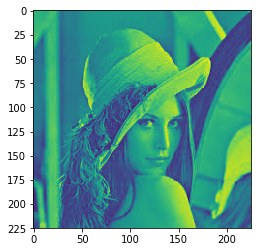

In [20]:
imagen = imread(fname="imagen.png")
print(imagen)
imshow(imagen)

**Definicion de los limites de los bloques de la imagen**

In [81]:
def limites(id):
    x=id%4
    y=(id%16)//4

    limites = np.array([y,x])
    return limites

**Definicion de la funcion que desordena los bloques de la imagen**

In [83]:
def desordenar_matriz(matriz):
    matriz_aleatoria = np.random.choice(np.arange(16), 16, replace=False).reshape((4,4))
    celdas_ver = np.zeros((55,275))
    for y in range(0,4,2):
        celdas_hor_1 = np.zeros((55,55))
        celdas_hor_2 = np.zeros((55,55))
        for x in range(0,4,2):
            #se toman los primeros 4 id aleatorios de arriba-abajo y izq-derecha 
            #de la matriz aleatoria para obtener los limites de cada bloque especifico
            id_celda_1 = limites(matriz_aleatoria[y,x])
            id_celda_2 = limites(matriz_aleatoria[y,x+1])
            id_celda_3 = limites(matriz_aleatoria[y+1,x])
            id_celda_4 = limites(matriz_aleatoria[y+1,x+1])
            
            #se extrae la informacion de cada bloque en especifico
            celda_temp_1 = np.array(matriz[id_celda_1[0]*55:(id_celda_1[0]*55)+55, id_celda_1[1]*55:(id_celda_1[1]*55)+55])
            celda_temp_2 = np.array(matriz[id_celda_2[0]*55:(id_celda_2[0]*55)+55, id_celda_2[1]*55:(id_celda_2[1]*55)+55])
            celda_temp_3 = np.array(matriz[id_celda_3[0]*55:(id_celda_3[0]*55)+55, id_celda_3[1]*55:(id_celda_3[1]*55)+55])
            celda_temp_4 = np.array(matriz[id_celda_4[0]*55:(id_celda_4[0]*55)+55, id_celda_4[1]*55:(id_celda_4[1]*55)+55])
            
            #se hace un apilamiento horizontal entre las celdas correspondientes a sus filas
            celdas_hor_1 = np.hstack((celdas_hor_1,celda_temp_1, celda_temp_2))
            celdas_hor_2 = np.hstack((celdas_hor_2,celda_temp_3, celda_temp_4))

        #se hace un apilamiento vertical de cadas filas completas
        celdas_ver = np.vstack((celdas_ver,celdas_hor_1, celdas_hor_2))
    return celdas_ver

**Mostrar la imagen con los bloques desordenados**

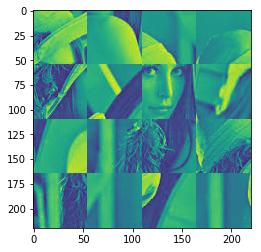

In [82]:
#se elimina las primeras 55 filas y columnas puesto que fueron agregadas para poder
#usar la funcion de apilamiento vertical y horizontal
imagen_desordenada = desordenar_matriz(imagen)
imshow(imagen_desordenada[55:, 55:])